In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib
import numpy as np
import pandas as pd

for font in font_manager.findSystemFonts('/Users/leonardokuffo/Library/Fonts/'):
    font_manager.fontManager.addfont(font)

matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
matplotlib.rc('font', family='Droid Serif') 

In [5]:
DATASETS_MAPPING = {
    'nytimes-16-angular': 'NYTimes/16',
    # 'glove-25-angular': 'GloVe/25',
    'glove-50-angular': 'GloVe/50',
    'deep-image-96-angular': 'DEEP/96',
    'sift-128-euclidean': 'SIFT/128',
    'glove-200-angular': 'GloVe/200',
    'msong-420': 'MSong/420',
    'har-561': 'HAR/561',
    'contriever-768': 'Contriever/768',
    'instructorxl-arxiv-768': 'arXiv/768',
    'fashion-mnist-784-euclidean': 'F-MNIST/784',
    # 'mnist-784-euclidean': 'MNIST/784',
    'gist-960-euclidean': 'GIST/960',
    'openai-1536-angular': 'OpenAI/1536',
    'trevi-4096': 'Trevi/4096',
    'stl-9216': 'STL/9216'
}
arch = 'SAPPHIRE'

In [6]:
linear = pd.read_csv(f'../{arch}/IVF_BRUTEFORCE.csv')
pdx_ads = pd.read_csv(f'../{arch}/IVF_PDX_ADSAMPLING.csv')
pdx_bsa = pd.read_csv(f'../{arch}/IVF_PDX_BSA.csv')
pdx_bond = pd.read_csv(f'../{arch}/IVF_PDX_BOND.csv')
pdx_bond = pdx_bond[pdx_bond['algorithm'] == 'pdx-bond-sec']


linear['algorithm'] = 'Linear-Scan'
pdx_ads['algorithm'] = 'ADSampling-PDX'
pdx_bsa['algorithm'] = 'BSA-PDX'
pdx_bond['algorithm'] = 'PDX-BOND'

df = pd.concat([
    #linear, 
    pdx_ads, 
    pdx_bsa, 
    pdx_bond
], ignore_index=True)
df = df.groupby(['algorithm', 'dataset', 'recall']).agg({
    'avg': 'min',
    'max': 'min',
    'min': 'min',
    'ivf_nprobe': 'min',
}).reset_index().sort_values(['algorithm', 'dataset', 'ivf_nprobe'])
df['avg'] = 1000 / df['avg']
df = df[['algorithm', 'dataset', 'recall', 'avg']]
df.columns =  ['Algorithm', 'Dataset', 'Recall', 'QPS']


df = df[df['Recall'] > 0.70]

/var/folders/g_/tfhsysh13vz_74rpmgswx9hc0000gn/T/ipykernel_18452/258284456.py:34: UserWarning: The markers list has more values (4) than needed (2), which may not be intended.
  sns.lineplot(
/var/folders/g_/tfhsysh13vz_74rpmgswx9hc0000gn/T/ipykernel_18452/258284456.py:34: UserWarning: The markers list has more values (4) than needed (2), which may not be intended.
  sns.lineplot(
/var/folders/g_/tfhsysh13vz_74rpmgswx9hc0000gn/T/ipykernel_18452/258284456.py:34: UserWarning: The markers list has more values (4) than needed (2), which may not be intended.
  sns.lineplot(
/var/folders/g_/tfhsysh13vz_74rpmgswx9hc0000gn/T/ipykernel_18452/258284456.py:34: UserWarning: The markers list has more values (4) than needed (2), which may not be intended.
  sns.lineplot(
/var/folders/g_/tfhsysh13vz_74rpmgswx9hc0000gn/T/ipykernel_18452/258284456.py:34: UserWarning: The markers list has more values (4) than needed (2), which may not be intended.
  sns.lineplot(
/var/folders/g_/tfhsysh13vz_74rpmgswx9hc

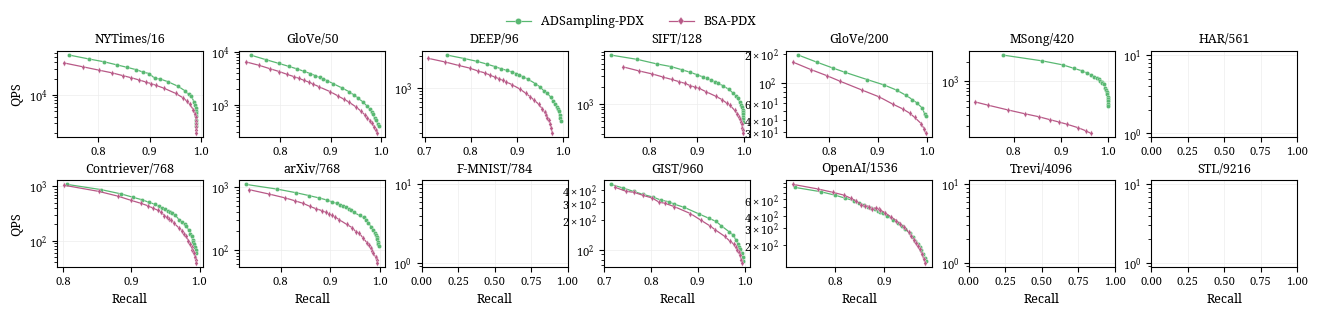

In [7]:
import seaborn as sns

colors = {
            'Linear-Scan': '##d96a6a',
            'ADSampling-PDX': '#59b872',
            'PDX-BOND': '#5970B8',
            'BSA-PDX': '#b85987'
        }

dashes = {
            'Linear-Scan': '',
            'PDX-BOND': '',
            'ADSampling-PDX': '',
            'BSA-PDX': ''
}

font = {'size': 8}
matplotlib.rc('font', **font)

fig, (
    (ax1, ax2, ax3, ax4, ax5, ax6, ax7),
    (ax9, ax10, ax11, ax12, ax13, ax14, ax15),
) = plt.subplots(2, 7)
fig.set_size_inches(16, 2.8)
plots = [ax1, ax2, ax3, ax4, ax5, ax6, ax7,  ax9, ax10, ax11, ax12, ax13, ax14, ax15]

plt.subplots_adjust(hspace=0.50, wspace=0.25)

for i, dataset in enumerate(list(DATASETS_MAPPING.keys())[:]):
    ax = plots[i]
    dataset_name = DATASETS_MAPPING[dataset]
    to_plot = df[df['Dataset'] == dataset]

    sns.lineplot(
        data=to_plot,
        x="Recall", 
        y="QPS",
        hue="Algorithm",
        markers=['o', 'd', 'P', 'X'],
        dashes=dashes,
        palette=colors,
        style='Algorithm',
        linewidth=0.9,
        markeredgewidth=0.2,
        markersize=3.0,
        ax=ax,
    )
    
    ax.xaxis.grid(linewidth=0.5, color='#ededed')
    ax.yaxis.grid(linewidth=0.5, color='#ededed')
    ax.set_axisbelow(True)
    
    ax.legend(
        loc="upper left",
        prop={'size': 9},
        ncols=5,
        frameon=False,
        bbox_to_anchor=(3.0,1.55),
        markerscale=1.5
    )
    
    ax.set_title(dataset_name, fontsize=9)
    ax.set_xlabel(f'Recall', fontsize=9)
    ax.set_ylabel('QPS', fontsize=9)
    ax.set_yscale('log')
    
    if (i != 0):
        ax.legend().remove()
    if (i != 0 and i != 7):
        ax.set_ylabel('')
    if (i < 7):
        ax.set_xlabel('')

# plt.savefig(f'../publication_figures/PDX_BOND_QPS_{arch}.png', format='png', dpi=600, bbox_inches='tight')

In [15]:
combined = linear.merge(
    pdx_bond, on=['dataset', 'ivf_nprobe'], how='inner', suffixes=('_linear', '_bond')
).merge(
    pdx_ads, on=['dataset', 'ivf_nprobe'], how='inner', suffixes=('', '_pdx_ads')
).merge(
    pdx_bsa, on=['dataset', 'ivf_nprobe'], how='inner', suffixes=('', '_pdx_bsa')
)

combined = combined[combined['recall'] < 0.90]

combined = combined[['dataset', 'recall_linear', 'ivf_nprobe', 'avg_linear', 'avg_bond', 'avg', 'avg_pdx_bsa']]
combined['avg_linear'] = 1000 / combined['avg_linear']
combined['avg'] = 1000 / combined['avg']
combined['avg_bond'] = 1000 / combined['avg_bond']
combined['avg_pdx_bsa'] = 1000 / combined['avg_pdx_bsa']
combined = combined.rename(columns = {'avg': 'avg_pdx_ads'})

# Taking the minimum nprobe to achieve the highest possible recall 
combined = combined.groupby(['dataset', 'recall_linear']).last().reset_index().groupby(['dataset']).last().reset_index()

combined = combined[combined['dataset'].isin(list(DATASETS_MAPPING.keys()))]

combined['speedup_adsampling'] = combined['avg_pdx_ads'] / combined['avg_linear']
combined['speedup_adsampling_bond'] = combined['avg_pdx_ads'] / combined['avg_bond']
combined['speedup_bsa'] = combined['avg_pdx_bsa'] / combined['avg_linear']
combined['speedup_adsampling_bsa'] = combined['avg_pdx_bsa'] / combined['avg_bond']
combined['speedup_linear'] = combined['avg_bond'] / combined['avg_linear']

print('Results for', arch)
print('Average Speedup of BSA against Linear:', combined['speedup_bsa'].mean())
print('Average Speedup of ADSampling against Linear:', combined['speedup_adsampling'].mean())
print('Average Speedup of PDX BOND against Linear:', combined['speedup_linear'].mean())
print('Average Speedup of ADSampling against BOND:', combined['speedup_adsampling_bond'].mean())
print('Average Speedup of BSA against BOND:', combined['speedup_adsampling_bsa'].mean())
combined[['dataset', 'recall_linear', 'ivf_nprobe', 'speedup_adsampling', 'speedup_bsa', 'speedup_linear', 'speedup_adsampling_bond', 'speedup_adsampling_bsa']]

Results for GRAVITON3
Average Speedup of BSA against Linear: 3.5812703314448684
Average Speedup of ADSampling against Linear: 3.9046795027619416
Average Speedup of PDX BOND against Linear: 3.991284793042059
Average Speedup of ADSampling against BOND: 0.9739122523702497
Average Speedup of BSA against BOND: 0.8556218073344957


,dataset,recall_linear,ivf_nprobe,speedup_adsampling,speedup_bsa,speedup_linear,speedup_adsampling_bond,speedup_adsampling_bsa
0,contriever-768,0.895,6,5.082537,4.422422,4.332285,1.173177,1.020806
1,deep-image-96-angular,0.893,8,3.055898,1.939475,3.031776,1.007956,0.639716
2,fashion-mnist-784-euclidean,0.796,2,2.314375,2.110847,4.156915,0.556753,0.507792
3,gist-960-euclidean,0.896,24,5.959814,6.096179,4.461375,1.335869,1.366435
4,glove-200-angular,0.873,80,4.311454,3.148759,3.886676,1.109291,0.810142
6,glove-50-angular,0.881,16,2.607624,1.659995,2.657974,0.981057,0.624534
7,har-561,0.878,3,2.065454,2.003896,4.442406,0.464940,0.451083
8,instructorxl-arxiv-768,0.897,9,6.056290,5.601786,4.509470,1.343016,1.242227
10,msong-420,0.880,5,4.744610,4.945353,4.385497,1.081887,1.127661
11,nytimes-16-angular,0.881,20,2.074515,0.910911,2.285588,0.907651,0.398545


In [15]:
combined = linear.merge(
    pdx_bond, on=['dataset', 'ivf_nprobe'], how='inner', suffixes=('_linear', '_bond')
).merge(
    pdx_ads, on=['dataset', 'ivf_nprobe'], how='inner', suffixes=('', '_pdx_ads')
).merge(
    pdx_bsa, on=['dataset', 'ivf_nprobe'], how='inner', suffixes=('', '_pdx_bsa')
)

combined = combined[['dataset', 'recall_linear', 'ivf_nprobe', 'avg_linear', 'avg_bond', 'avg', 'avg_pdx_bsa']]
combined['avg_linear'] = 1000 / combined['avg_linear']
combined['avg'] = 1000 / combined['avg']
combined['avg_bond'] = 1000 / combined['avg_bond']
combined['avg_pdx_bsa'] = 1000 / combined['avg_pdx_bsa']
combined = combined.rename(columns = {'avg': 'avg_pdx_ads'})

# Taking the minimum nprobe to achieve the highest possible recall 
combined = combined.groupby(['dataset', 'recall_linear']).last().reset_index().groupby(['dataset']).last().reset_index()

combined = combined[combined['dataset'].isin(list(DATASETS_MAPPING.keys()))]

combined['speedup_adsampling'] = combined['avg_pdx_ads'] / combined['avg_linear']
combined['speedup_bsa'] = combined['avg_pdx_bsa'] / combined['avg_linear']
combined['speedup_linear'] = combined['avg_bond'] / combined['avg_linear']

print('Results for', arch)
print('Average Speedup of BSA against Linear:', combined['speedup_bsa'].mean())
print('Average Speedup of ADSampling against Linear:', combined['speedup_adsampling'].mean())
print('Average Speedup of PDX BOND against Linear:', combined['speedup_linear'].mean())
combined[['dataset', 'recall_linear', 'ivf_nprobe', 'speedup_adsampling', 'speedup_bsa', 'speedup_linear']]

Results for GRAVITON4
Average Speedup of BSA against Linear: 7.245836026987008
Average Speedup of ADSampling against Linear: 8.78130603940166
Average Speedup of PDX BOND against Linear: 4.441470945656939


,dataset,recall_linear,ivf_nprobe,speedup_adsampling,speedup_bsa,speedup_linear
0,contriever-768,0.998,144,8.882080,5.824277,4.103138
1,deep-image-96-angular,0.998,96,5.043051,2.935811,4.463230
2,fashion-mnist-784-euclidean,1.000,20,9.313629,6.021052,4.792301
3,gist-960-euclidean,0.996,160,11.136725,10.366356,4.714392
5,glove-200-angular,0.974,160,4.232030,3.045087,3.669447
7,glove-50-angular,0.995,160,3.100528,2.177158,3.412437
8,har-561,1.000,20,5.734803,5.538270,4.536316
9,instructorxl-arxiv-768,0.997,160,14.542933,8.779328,5.287846
11,msong-420,1.000,64,11.494365,6.836123,5.361198
12,nytimes-16-angular,0.988,144,2.509495,1.695106,2.656302
